In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
import pandas as pd
df = pd.read_csv("train.csv")

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
((df.isnull().sum())/len(df))*100

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


In [ ]:
df.drop("PassengerId",axis=1,inplace=True)#Each entry as a unique ID

In [ ]:
df.drop("Cabin",axis=1,inplace=True) #77% of data is missing

In [ ]:
numeric_df = df.select_dtypes(include=['number'])

In [ ]:
df = df.dropna(subset=['Age'])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Age', ylabel='Count'>

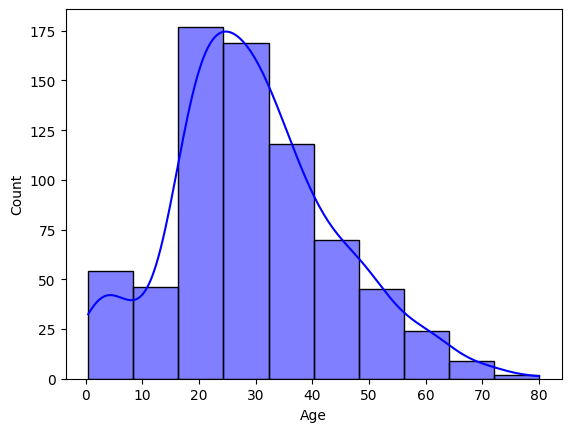

In [ ]:
sns.histplot(df['Age'],bins=10,kde=True, color="Blue",edgecolor='black')

The distribution is right-skewed, meaning most passengers were young (20–30 age group has the highest count).

Fewer passengers were older than 50.

The KDE curve (blue line) confirms this skewness.

There's a significant number of children as well, visible near age 0–10.

<Axes: xlabel='Fare', ylabel='Count'>

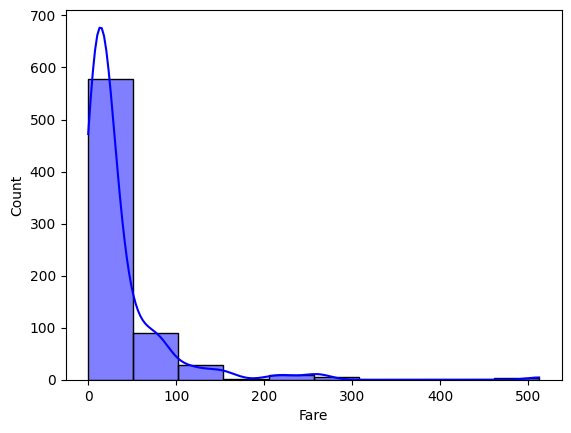

In [ ]:
sns.histplot(df['Fare'],bins=10,kde=True, color="Blue",edgecolor='black')

Most fares are between 0 and 100, with a high concentration near the lower end.

A few extreme outliers (some fares above 300 or even 500).

This distribution is highly right-skewed.

The KDE curve shows a sharp peak followed by a long tail, typical of positively skewed data.

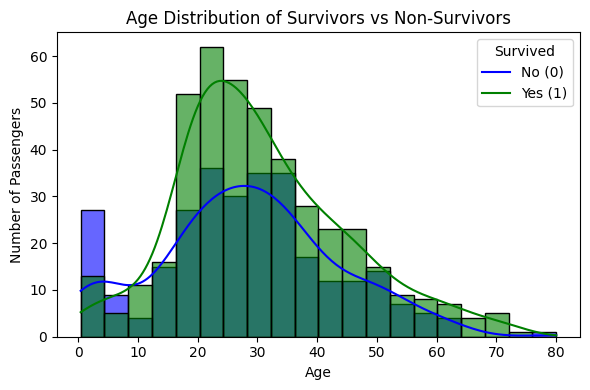

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Age', hue='Survived', bins=20, kde=True, palette=['green', 'blue'], alpha=0.6)
plt.title('Age Distribution of Survivors vs Non-Survivors')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived', labels=['No (0)', 'Yes (1)'])
plt.tight_layout()
plt.show()

The green bars and line (Survived = 1) are taller around ages 20–40, showing a higher number of middle-aged survivors.

The blue line (Not Survived = 0) is more spread out, especially noticeable in:

Very young ages (around 0–10)

Older ages (50+), where more non-survivors are present

The peak of survivors is slightly left-shifted, indicating that younger to middle-aged adults had a better survival rate.

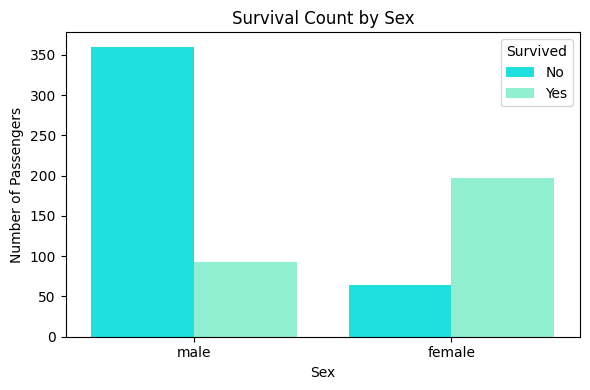

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Sex', hue='Survived', palette=['cyan', 'aquamarine'])
plt.title('Survival Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

From the plot, it is clear that female passengers had a higher survival rate compared to males. This pattern aligns with historical records and can be attributed to the “women and children first” evacuation protocol enforced during the Titanic disaster.

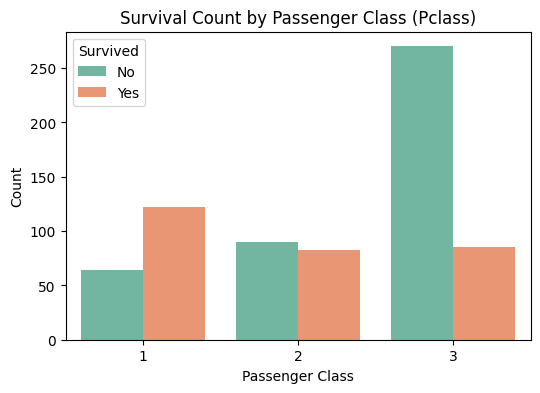

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Pclass', hue='Survived', palette='Set2')
plt.title('Survival Count by Passenger Class (Pclass)')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

The plot shows that 1st class passengers had a higher survival rate compared to 2nd and 3rd class. This can be explained by several factors related to the conditions and social dynamics on the Titanic:

Cabin proximity to lifeboats (1st class cabins were located on upper decks).

Social priority during rescue efforts.

Better awareness and quicker access to evacuation.

In [ ]:
data= pd.crosstab(index=[df['Survived']], columns=[df['Pclass'],df['Sex'],df['Embarked']], values=df['Age'], aggfunc='count')
data

Pclass        1                                  2                             \
Sex      female             male            female            male              
Embarked      C    Q     S     C    Q     S      C    Q     S    C    Q     S   
Survived                                                                        
0           1.0  NaN   2.0  20.0  1.0  40.0    NaN  NaN   6.0  7.0  1.0  76.0   
1          37.0  1.0  42.0  16.0  NaN  24.0    7.0  1.0  60.0  1.0  NaN  14.0   

Pclass        3                                
Sex      female             male               
Embarked      C    Q     S     C     Q      S  
Survived                                       
0           5.0  5.0  45.0  18.0  13.0  184.0  
1          11.0  5.0  31.0   7.0   1.0   30.0

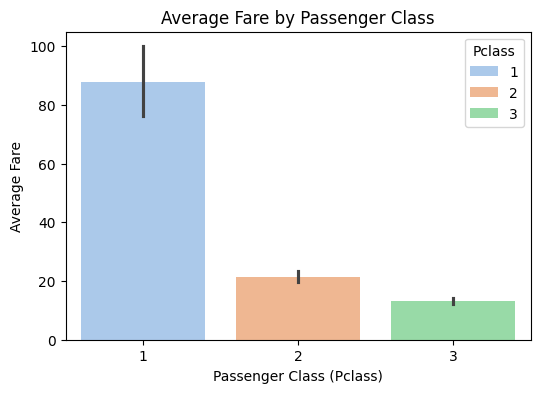

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x='Pclass', y='Fare',hue='Pclass', data=df, palette='pastel')
plt.title('Average Fare by Passenger Class')
plt.xlabel('Passenger Class (Pclass)')
plt.ylabel('Average Fare')
plt.show()

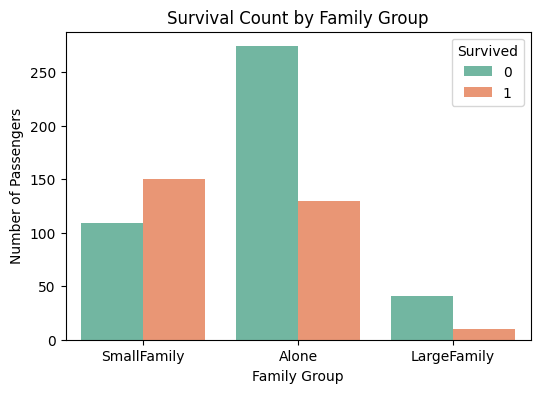

In [ ]:
import warnings
warnings.filterwarnings("ignore")

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
def family_group(size):
    if size == 1:
        return 'Alone'
    elif size <= 4:
        return 'SmallFamily'
    else:
        return 'LargeFamily'
df['FamilyGroup'] = df['FamilySize'].apply(family_group)

plt.figure(figsize=(6,4))
sns.countplot(x='FamilyGroup', hue='Survived', data=df, palette='Set2')
plt.title('Survival Count by Family Group')
plt.xlabel('Family Group')
plt.ylabel('Number of Passengers')
plt.show()

<Axes: xlabel='SibSp', ylabel='Age'>

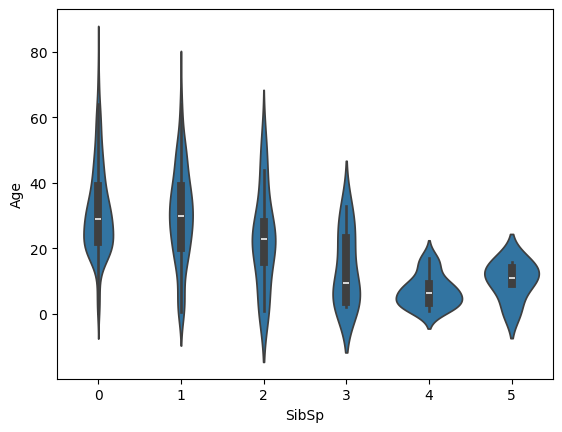

In [ ]:
sns.violinplot(x='SibSp', y='Age', data=df)

<Axes: xlabel='Parch', ylabel='Age'>

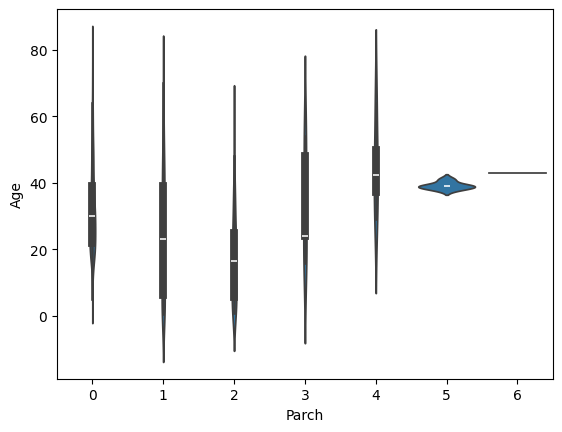

In [ ]:
sns.violinplot(x='Parch', y='Age', data=df)

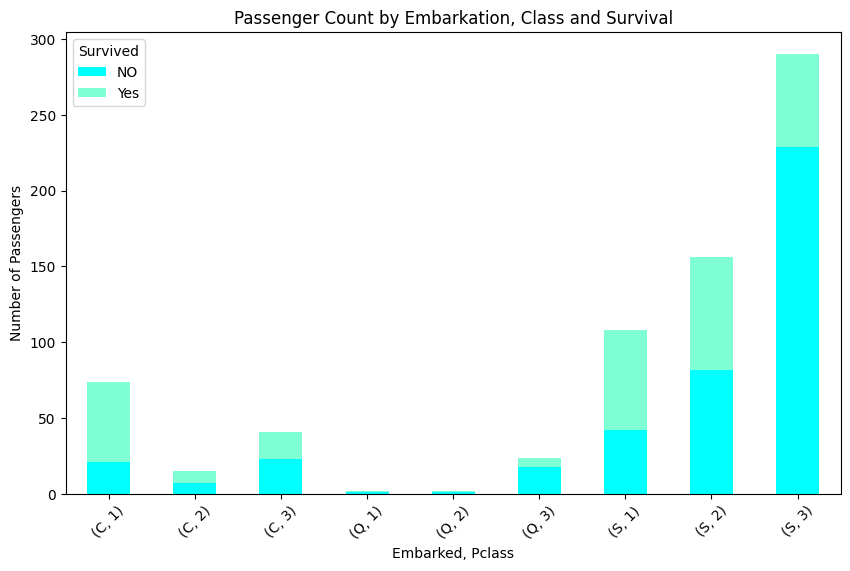

In [ ]:
counts = df.groupby(['Embarked', 'Pclass', 'Survived']).size().unstack(fill_value=0)
counts.plot(kind='bar', stacked=True, figsize=(10,6), color=['cyan', 'aquamarine'])
plt.title('Passenger Count by Embarkation, Class and Survival')
plt.xlabel('Embarked, Pclass')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=45)
plt.legend(title='Survived', labels=['NO', 'Yes'])
plt.show()

(C, 1) passengers had the highest survival rate, indicating that 1st class passengers from Cherbourg were prioritized during evacuation.

(S, 3) group had the largest number of passengers but the lowest survival, showing how 3rd class passengers from Southampton were most vulnerable.

Across all embarkation points (C, Q, S), 1st class passengers consistently had higher survival rates than 2nd and 3rd class, proving class was a stronger factor than embarkation alone.

<Axes: >

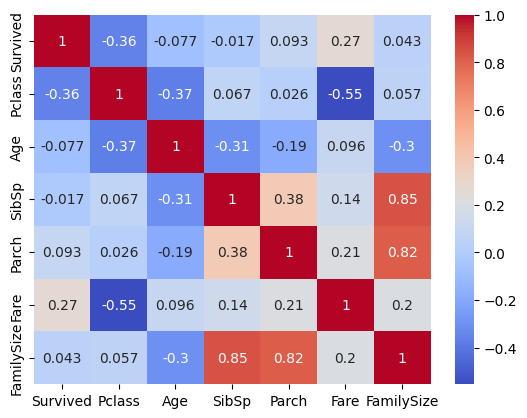

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')

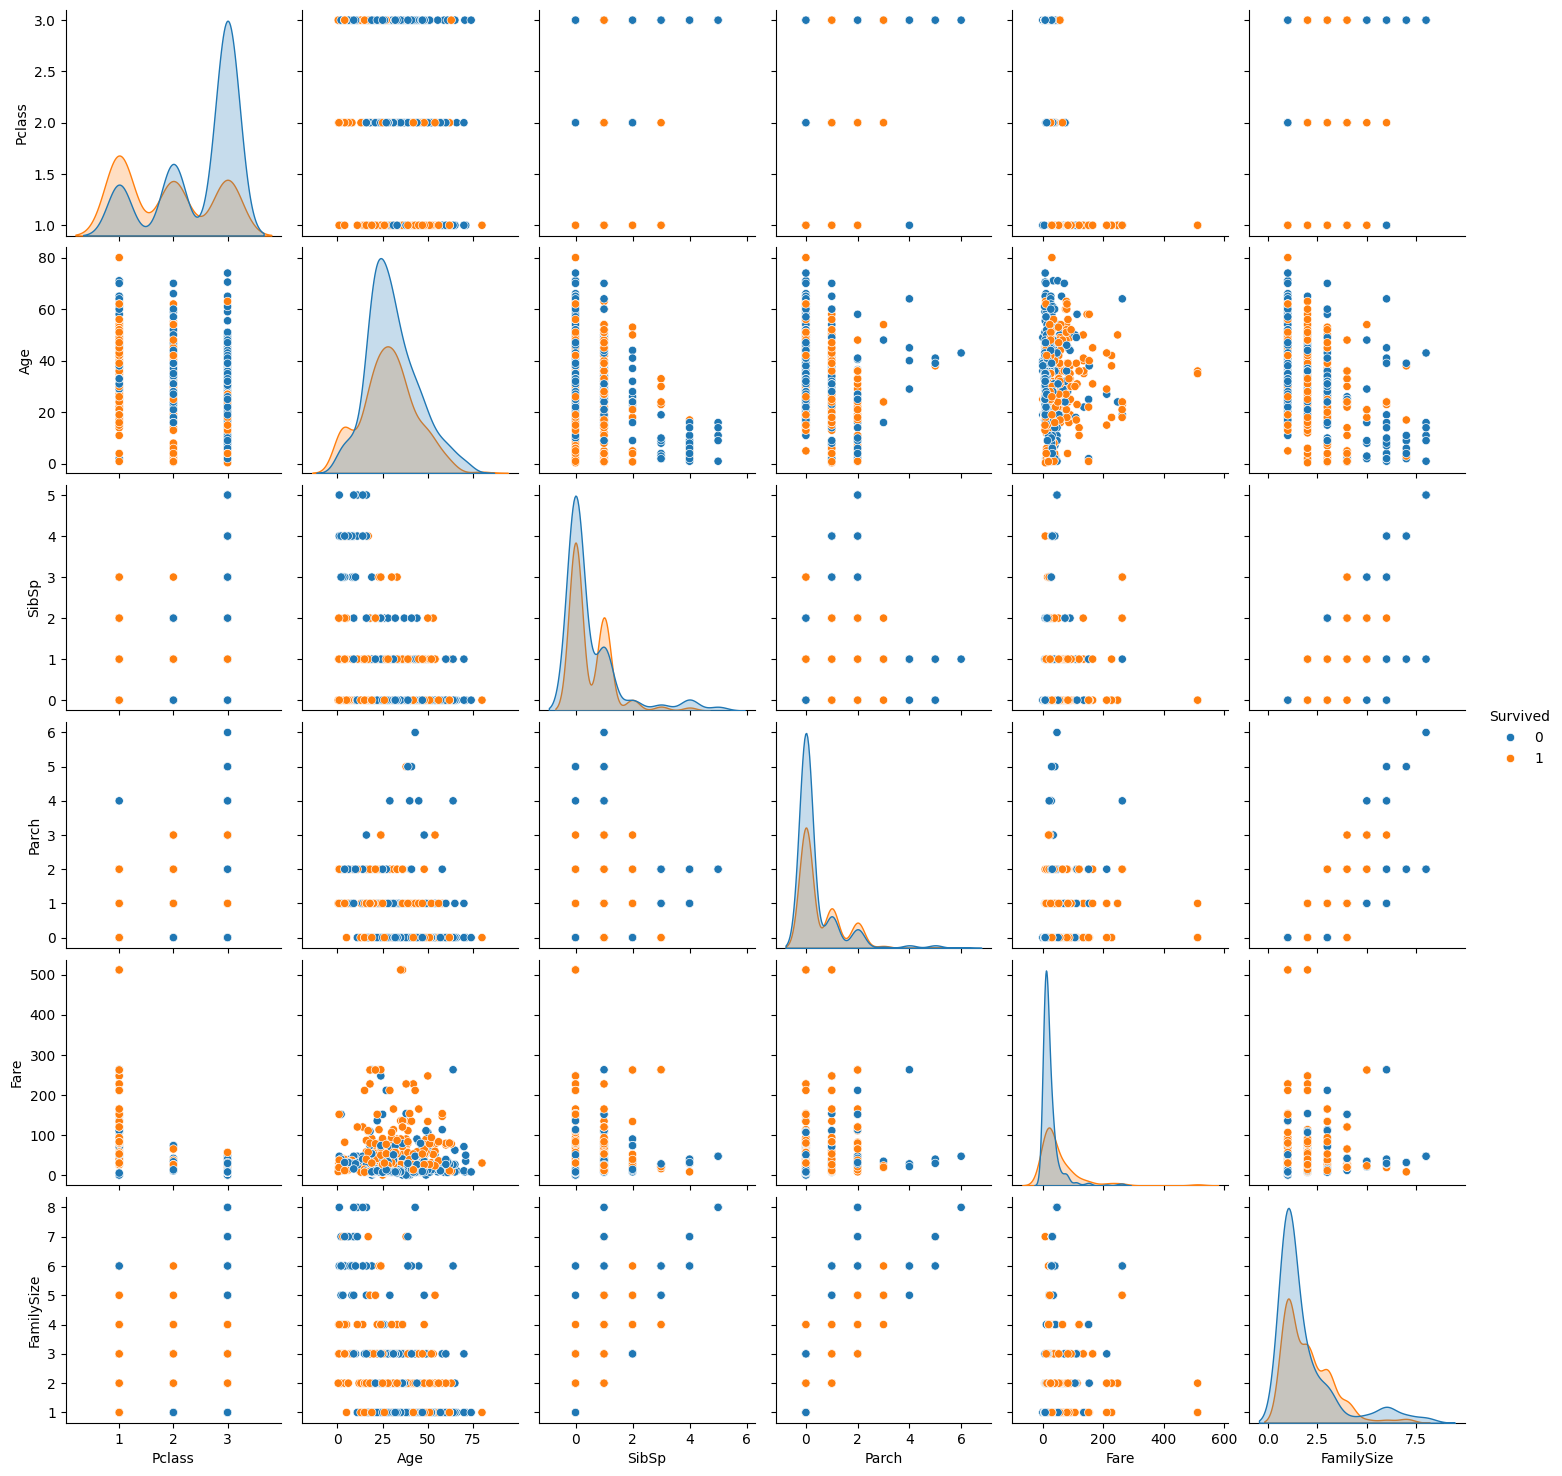

In [ ]:
sns.pairplot(df, hue='Survived')